# Analyze A/B Test Results 


<a id='probability'></a>
## Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

### ToDo 1.1
Now, read in the `ab_data.csv` data. Store it in `df`. Below is the description of the data, there are a total of 5 columns:

<center>

|Data columns|Purpose|Valid values|
| ------------- |:-------------| -----:|
|user_id|Unique ID|Int64 values|
|timestamp|Time stamp when the user visited the webpage|-|
|group|In the current A/B experiment, the users are categorized into two broad groups. <br>The `control` group users are expected to be served with `old_page`; and `treatment` group users are matched with the `new_page`. <br>However, **some inaccurate rows** are present in the initial data, such as a `control` group user is matched with a `new_page`. |`['control', 'treatment']`|
|landing_page|It denotes whether the user visited the old or new webpage.|`['old_page', 'new_page']`|
|converted|It denotes whether the user decided to pay for the company's product. Here, `1` means yes, the user bought the product.|`[0, 1]`|
</center>
Use your dataframe to answer the questions in Quiz 1 of the classroom.


>**Tip**: Please save your work regularly.

**a.** Read in the dataset from the `ab_data.csv` file and take a look at the top few rows here:

In [2]:
# read data
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


**b.** Use the cell below to find the number of rows in the dataset.

In [3]:
# Number of rows
no_of_rows = len(df)
no_of_rows

294478

**c.** The number of unique users in the dataset.

In [4]:
no_of_unique = len(pd.unique(df['user_id']))
no_of_unique

290584

**d.** The proportion of users converted.

In [5]:
prop_of_converted = df['converted'].mean()
prop_of_converted

0.11965919355605512

**e.** The number of times when the "group" is `treatment` but "landing_page" is not a `new_page`.

In [6]:
treatment_not_newpage = df[~((df['group'] == 'treatment') == (df['landing_page'] == 'new_page'))].shape[0]
treatment_not_newpage

3893

**f.** Do any of the rows have missing values?

In [7]:
missing_values = df.isna().sum().sum()
missing_values

0

### ToDo 1.2  
In a particular row, the **group** and **landing_page** columns should have either of the following acceptable values:

|user_id| timestamp|group|landing_page|converted|
|---|---|---|---|---|
|XXXX|XXXX|`control`| `old_page`|X |
|XXXX|XXXX|`treatment`|`new_page`|X |


It means, the `control` group users should match with `old_page`; and `treatment` group users should matched with the `new_page`. 

However, for the rows where `treatment` does not match with `new_page` or `control` does not match with `old_page`, we cannot be sure if such rows truly received the new or old wepage.  


Use **Quiz 2** in the classroom to figure out how should we handle the rows where the group and landing_page columns don't match?

**a.** Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
# Remove the inaccurate rows, and store the result in a new dataframe df2
not_matched_rows_ids = df[((df.group == 'control') & (df.landing_page == 'new_page')) | ((df.group == 'treatment') & (df.landing_page == 'old_page'))].index
df2 = df.drop(not_matched_rows_ids)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       290585 non-null  int64 
 1   timestamp     290585 non-null  object
 2   group         290585 non-null  object
 3   landing_page  290585 non-null  object
 4   converted     290585 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [9]:
# Double Check all of the incorrect rows were removed from df2 - 
# Output of the statement below should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

### ToDo 1.3  
Use **df2** and the cells below to answer questions for **Quiz 3** in the classroom.

**a.** How many unique **user_id**s are in **df2**?

In [10]:
unique_users = df2.user_id.unique()
len(unique_users)

290584

**b.** There is one **user_id** repeated in **df2**.  What is it?

In [11]:
repeated_user = df2[df2['user_id'].duplicated()]['user_id']
repeated_user

2893    773192
Name: user_id, dtype: int64

**c.** Display the rows for the duplicate **user_id**? 

In [12]:
repeated_rows = df2[df2['user_id'] == repeated_user.iloc[0]]
repeated_rows

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**d.** Remove **one** of the rows with a duplicate **user_id**, from the **df2** dataframe.

In [13]:
# Remove one of the rows with a duplicate user_id..
# Hint: The dataframe.drop_duplicates() may not work in this case because the rows with duplicate user_id are not entirely identical. 

df2.drop_duplicates(['user_id'], inplace=True)

# Check again if the row with a duplicate user_id is deleted or not
df2[df2['user_id'] == repeated_user.iloc[0]]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


### ToDo 1.4  
Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

**a.** What is the probability of an individual converting regardless of the page they receive?<br><br>


In [14]:
prop_converted = df2['converted'].mean()
prop_converted

0.11959708724499628

**b.** Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
prop_converted_control = df2[df2['group'] == 'control']['converted'].mean()
prop_converted_control

0.1203863045004612

**c.** Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
prop_converted_treatment = df2[df2['group'] == 'treatment']['converted'].mean()
prop_converted_treatment

0.11880806551510564

In [17]:
# Calculate the actual difference (obs_diff) between the conversion rates for the two groups.
obs_diff = prop_converted_control - prop_converted_treatment
obs_diff

0.0015782389853555567

**d.** What is the probability that an individual received the new page?

In [18]:
prop_indvid_newpage = df2[df2['landing_page'] == 'new_page']['group'].count() / len(df2)
prop_indvid_newpage

0.5000619442226688

**e.** Consider your results from parts (a) through (d) above, and explain below whether the new `treatment` group users lead to more conversions.

>****
1- the people in control and treatment group are 50% and that give equal presentation for both
>****
2- coverstion rate of control group is 12%  and treatment group is 11.88%  that make us know that there is no significant to use the new page cause treatment group conversion rate is not significantly positivly affected

<a id='ab_test'></a>
## Part II - A/B Test

Since a timestamp is associated with each event, you could run a hypothesis test continuously as long as you observe the events. 

However, then the hard questions would be: 
- Do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  
- How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


### ToDo 2.1
For now, consider you need to make the decision just based on all the data provided.  

> Recall that you just calculated that the "converted" probability (or rate) for the old page is *slightly* higher than that of the new page (ToDo 1.4.c). 

If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should be your null and alternative hypotheses (**$H_0$** and **$H_1$**)?  

You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the "converted" probability (or rate) for the old and new pages respectively.

### H0 = Pnew - Pold =< 0
### H1 = Pnew - Pold >  0

### ToDo 2.2 - Null Hypothesis $H_0$ Testing
Under the null hypothesis $H_0$, assume that $p_{new}$ and $p_{old}$ are equal. Furthermore, assume that $p_{new}$ and $p_{old}$ both are equal to the **converted** success rate in the `df2` data regardless of the page. So, our assumption is: <br><br>
<center>
$p_{new}$ = $p_{old}$ = $p_{population}$
</center>

In this section, you will: 

- Simulate (bootstrap) sample data set for both groups, and compute the  "converted" probability $p$ for those samples. 


- Use a sample size for each group equal to the ones in the `df2` data.


- Compute the difference in the "converted" probability for the two samples above. 


- Perform the sampling distribution for the "difference in the converted probability" between the two simulated-samples over 10,000 iterations; and calculate an estimate. 



Use the cells below to provide the necessary parts of this simulation.  You can use **Quiz 5** in the classroom to make sure you are on the right track.

**a.** What is the **conversion rate** for $p_{new}$ under the null hypothesis? 

In [19]:
Pnew = df2['converted'].mean()
Pnew

0.11959708724499628

**b.** What is the **conversion rate** for $p_{old}$ under the null hypothesis? 

In [20]:
Pold = df2['converted'].mean()
Pold

0.11959708724499628

**c.** What is $n_{new}$, the number of individuals in the treatment group? <br><br>
*Hint*: The treatment group users are shown the new page.

In [21]:
Nnew = df2[df2['landing_page'] == 'new_page'].count()['landing_page']
Nnew

145310

**d.** What is $n_{old}$, the number of individuals in the control group?

In [22]:
Nold = df2[df2['landing_page'] == 'old_page'].count()['landing_page']
Nold

145274

**e. Simulate Sample for the `treatment` Group**<br> 
Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null hypothesis.  <br><br>
*Hint*: Use `numpy.random.choice()` method to randomly generate $n_{new}$ number of values. <br>
Store these $n_{new}$ 1's and 0's in the `new_page_converted` numpy array.


In [23]:
# Simulate a Sample for the treatment Group
new_page_converted = np.random.choice([0,1], size = Nnew, p=[1-Pnew,Pnew])
new_page_converted

array([0, 0, 0, ..., 0, 0, 0])

**f. Simulate Sample for the `control` Group** <br>
Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null hypothesis. <br> Store these $n_{old}$ 1's and 0's in the `old_page_converted` numpy array.

In [24]:
# Simulate a Sample for the control Group
old_page_converted = np.random.choice([0,1], size = Nold,replace=True, p=[1-Pold,Pold])
old_page_converted

array([0, 0, 0, ..., 1, 0, 0])

**g.** Find the difference in the "converted" probability $(p{'}_{new}$ - $p{'}_{old})$ for your simulated samples from the parts (e) and (f) above. 

In [25]:
diff = (new_page_converted.mean()) - (old_page_converted.mean())
diff

-0.0002498837867211251


**h. Sampling distribution** <br>
Re-create `new_page_converted` and `old_page_converted` and find the $(p{'}_{new}$ - $p{'}_{old})$ value 10,000 times using the same simulation process you used in parts (a) through (g) above. 

<br>
Store all  $(p{'}_{new}$ - $p{'}_{old})$  values in a NumPy array called `p_diffs`.

In [26]:
# Sampling distribution 
p_diffs = []
for x in range(10000):
    new_page_converted = np.random.choice([0,1],size = Nnew,replace = True,p = [1-Pnew,Pnew])
    old_page_converted = np.random.choice([0,1],size = Nold,replace = True,p = [1-Pold,Pold])
    Pdiff = (new_page_converted.mean())- (old_page_converted.mean())
    p_diffs.append(Pdiff)

In [27]:
p_diffs

[-0.00045654189079757934,
 -0.0003943921698637276,
 -0.000353031216651728,
 -0.0012963905603773085,
 0.0003214520871874793,
 -0.0006561680833192668,
 0.0008514372401154657,
 0.0022139714076797185,
 0.0018219999184889146,
 0.0014637486531860894,
 -0.0009590542603171159,
 0.0005692238655500698,
 -0.0003052369374227648,
 -0.0026107262755716842,
 -0.0005181868216482394,
 -0.0002909872287758519,
 -0.00042856602267783706,
 0.0006448132434770659,
 0.001147346077459449,
 0.0023242684198263724,
 -0.00014666814191441335,
 0.0007482335329120904,
 -0.00037383703809255875,
 0.0003007281235979514,
 -0.0016743613252190037,
 0.0008718064863492553,
 0.001381376348002103,
 -0.0014955887045514371,
 -0.002562486894276142,
 -0.00042185131029696954,
 -0.0009999581738592278,
 0.0005280078689497703,
 -0.001936176462228295,
 -0.00047736135521364575,
 0.0012644089631440453,
 0.000562314740772285,
 7.361721006449162e-05,
 -0.0010761938877373312,
 -7.087753010290299e-05,
 0.0004797718983980265,
 0.002420564707623

**i. Histogram**<br> 
Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.<br><br>

Also, use `plt.axvline()` method to mark the actual difference observed  in the `df2` data (recall `obs_diff`), in the chart.  

>**Tip**: Display title, x-label, and y-label in the chart.

In [28]:
diff2 = prop_converted_treatment - prop_converted_control
diff2

-0.0015782389853555567

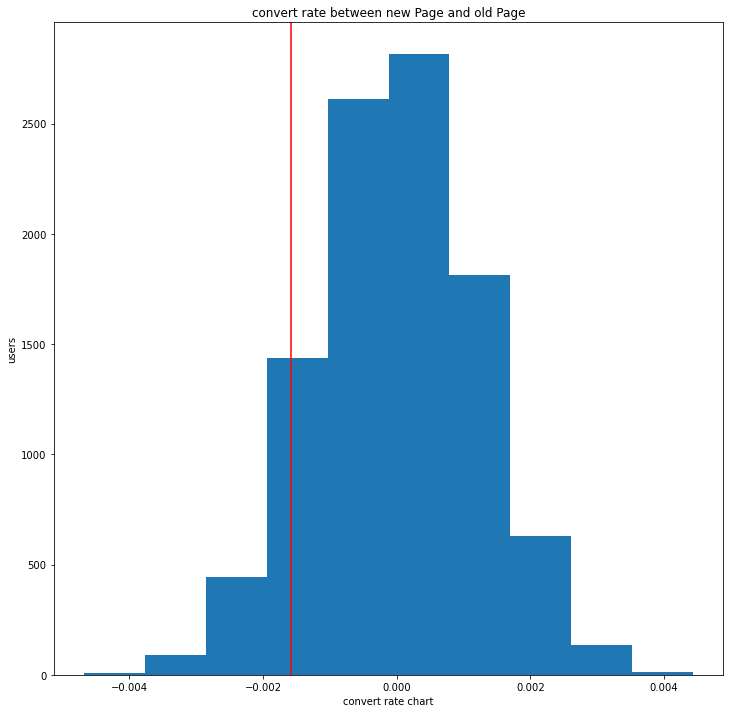

In [29]:
plt.figure(figsize=(12,12))
plt.xlabel('convert rate chart')
plt.ylabel('users')
plt.title('convert rate between new Page and old Page')
plt.axvline(diff2,c='red')
plt.hist(p_diffs);


**j.** What proportion of the **p_diffs** are greater than the actual difference observed in the `df2` data?

In [42]:
p_diffs = np.array(p_diffs)
( p_diffs > obs_diff ).mean()

0.0945

**k.** Please explain in words what you have just computed in part **j** above.  
 - What is this value called in scientific studies?  
 - What does this value signify in terms of whether or not there is a difference between the new and old pages? *Hint*: Compare the value above with the "Type I error rate (0.05)". 

# What is this value called in scientific studies?
P-Value
# What does this value signify in terms of whether or not there is a difference between the new and old pages?
wefound that p value is so big it is ~ 9.4 % and we should not be over 5% so we should reject null 
and stuck with alternative that mean we should get new pages and delete old pages 



**l. Using Built-in Methods for Hypothesis Testing**<br>
We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. 

Fill in the statements below to calculate the:
- `convert_old`: number of conversions with the old_page
- `convert_new`: number of conversions with the new_page
- `n_old`: number of individuals who were shown the old_page
- `n_new`: number of individuals who were shown the new_page


In [31]:
import statsmodels.api as sm

# number of conversions with the old_page
convert_old = df2.query('landing_page == "old_page" & converted == 1')['converted'].count()
convert_old

# number of conversions with the new_page
convert_new = df2.query('landing_page == "new_page" & converted == 1')['converted'].count()
convert_new

# number of individuals who were shown the old_page
n_old = Nold

# number of individuals who received new_page
n_new = Nnew

**m.** Now use `sm.stats.proportions_ztest()` to compute your test statistic and p-value.  [Here](https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html) is a helpful link on using the built in.

The syntax is: 
```bash
proportions_ztest(count_array, nobs_array, alternative='larger')
```
where, 
- `count_array` = represents the number of "converted" for each group
- `nobs_array` = represents the total number of observations (rows) in each group
- `alternative` = choose one of the values from `[‘two-sided’, ‘smaller’, ‘larger’]` depending upon two-tailed, left-tailed, or right-tailed respectively. 


The built-in function above will return the z_score, p_value. 



In [32]:
import statsmodels.api as sm
# ToDo: Complete the sm.stats.proportions_ztest() method arguments
z_score, p_value = sm.stats.proportions_ztest([convert_new,convert_old],[n_new,n_old],alternative = 'larger')
print(z_score, p_value)

-1.3109241984234394 0.9050583127590245


**n.** What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?<br><br>



>**we found that the number which we are clculated before in hypotheis test is true with z-test.**

<a id='regression'></a>
### Part III - A regression approach

### ToDo 3.1 
In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

**a.** Since each row in the `df2` data is either a conversion or no conversion, what type of regression should you be performing in this case?

>**the type which use here is logistic regression .**

**b.** The goal is to use **statsmodels** library to fit the regression model you specified in part **a.** above to see if there is a significant difference in conversion based on the page-type a customer receives. However, you first need to create the following two columns in the `df2` dataframe:
 1. `intercept` - It should be `1` in the entire column. 
 2. `ab_page` - It's a dummy variable column, having a value `1` when an individual receives the **treatment**, otherwise `0`.  

In [33]:
df2['intercept'] = 1
df2['intercept']

0         1
1         1
2         1
3         1
4         1
         ..
294473    1
294474    1
294475    1
294476    1
294477    1
Name: intercept, Length: 290584, dtype: int64

In [34]:
df2[['ab_page', 'old_page']] = pd.get_dummies(df2['landing_page'])
df2[['ab_page', 'old_page']]


,ab_page,old_page
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1
...,...,...
294473,0,1
294474,0,1
294475,0,1
294476,0,1


**c.** Use **statsmodels** to instantiate your regression model on the two columns you created in part (b). above, then fit the model to predict whether or not an individual converts. 


In [55]:
y = df2['converted']
z = df2[['intercept', 'ab_page']]
log = sm.Logit(y,z)
final = log.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


**d.** Provide the summary of your model below, and use it as necessary to answer the following questions.

In [36]:
summary = final.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Mon, 28 Mar 2022   Pseudo R-squ.:               8.077e-06
Time:                        08:47:10   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

**e.** What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  



>**as we see we found that old and new pages is not linear compared with converted rate so as result in  part 2 we will reject null hypothesis.**

**f.** Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

>**For sure we need to add more variables i see that this variables is so little to make a decision may be there is a factor affect on results so we should add more variables to our data may be we will found a linear regression with this variables .**

**g. Adding countries**<br> 
Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. 

1. You will need to read in the **countries.csv** dataset and merge together your `df2` datasets on the appropriate rows. You call the resulting dataframe `df_merged`. [Here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html) are the docs for joining tables. 

2. Does it appear that country had an impact on conversion?  To answer this question, consider the three unique values, `['UK', 'US', 'CA']`, in the `country` column. Create dummy variables for these country columns. 


In [37]:
# Read the countries.csv
df3 = pd.read_csv('countries.csv')
df3

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK
...,...,...
290579,653118,US
290580,878226,UK
290581,799368,UK
290582,655535,CA


In [38]:
# Join with the df2 dataframe
df_merged = df3.set_index('user_id').join(df2.set_index('user_id'))
df_merged.head(10)

,country,timestamp,group,landing_page,converted,intercept,ab_page,old_page
user_id,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0
909908,UK,2017-01-06 20:44:26.334764,treatment,new_page,0,1,1,0
811617,US,2017-01-02 18:42:11.851370,treatment,new_page,1,1,1,0
938122,US,2017-01-10 09:32:08.222716,treatment,new_page,1,1,1,0
887018,US,2017-01-06 11:09:40.487196,treatment,new_page,0,1,1,0


In [39]:
# Create the necessary dummy variables
df_merged[['UK', 'US', 'CA']] = pd.get_dummies(df_merged['country'])
df_merged.head(10)

,country,timestamp,group,landing_page,converted,intercept,ab_page,old_page,UK,US,CA
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,0,1,0
909908,UK,2017-01-06 20:44:26.334764,treatment,new_page,0,1,1,0,0,1,0
811617,US,2017-01-02 18:42:11.851370,treatment,new_page,1,1,1,0,0,0,1
938122,US,2017-01-10 09:32:08.222716,treatment,new_page,1,1,1,0,0,0,1
887018,US,2017-01-06 11:09:40.487196,treatment,new_page,0,1,1,0,0,0,1


In [43]:
y2 = df_merged['converted']
z2 = df_merged[['intercept','UK','CA']]

log2 = sm.Logit(y2, z2)
final2 = log2.fit()
final2.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Mon, 28 Mar 2022   Pseudo R-squ.:               1.521e-05
Time:                        08:51:06   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9868      0.011   -174.174      0.000      -2.009      -1.964
UK            -0.0507      0.028     -1.786      0.074      -0.106       0.005
CA            -0.0099      0.013     -0.746      0.456      -0.036       0.016
==============================================================================
"""

>**as we see p-value for countries is so high and exceed the 5% so we cant refuse null hypothesis country not affect too much on values which will make us search in new variables to get real effect make us reject null option .**

**h. Fit your model and obtain the results**<br> 
Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if are there significant effects on conversion.  **Create the necessary additional columns, and fit the new model.** 


Provide the summary results (statistical output), and your conclusions (written response) based on the results. 



In [51]:
# Fit your model, and summarize the results



In [50]:
df_merged['UK_ab_page'] = df_merged['UK'] * df_merged['ab_page']
df_merged['US_ab_page'] = df_merged['US'] * df_merged['ab_page']
df_merged

,country,timestamp,group,landing_page,converted,intercept,ab_page,old_page,UK,US,CA,UK_ab_page,US_ab_page
user_id,,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0,1,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,0,1,0,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,0,1,0,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0,1,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
653118,US,2017-01-09 03:12:31.034796,control,old_page,0,1,0,1,0,0,1,0,0
878226,UK,2017-01-05 15:02:50.334962,control,old_page,0,1,0,1,0,1,0,0,0
799368,UK,2017-01-09 18:07:34.253935,control,old_page,0,1,0,1,0,1,0,0,0


In [57]:
y3 = df_merged['converted']
z3 = df_merged[['intercept','ab_page','UK', 'US','UK_ab_page','US_ab_page']]

log3 = sm.Logit(y3, z3)
final3 = log3.fit()
final3.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Mon, 28 Mar 2022   Pseudo R-squ.:               3.482e-05
Time:                        09:12:08   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9865      0.010   -206.344      0.000      -2.005      -1.968
ab_page       -0.0206      0.014     -1.505      0.132      -0.047       0.006
UK            -0.0175      0.038     -0.465      0.642      -0.091       0.056
US            -0.0057      0.019     -0.306      0.760      -0.043       0.031
UK_ab_page    -0.0469      0.054     -0.872      0.383      -0.152       0.059
US_ab_page     0.0314      0.027      1.181      0.238      -0.021       0.084
==============================================================================
"""

>**After all tests we cant find a thing to make sure that new page is better than old one  and reject null so we will stay on old page  .**
